In [4]:
import kagglehub
import pandas as pd
import os

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
path = kagglehub.dataset_download("jockeroika/job-acceptance-prediction-system")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'job-acceptance-prediction-system' dataset.
Path to dataset files: /kaggle/input/job-acceptance-prediction-system


In [7]:
os.listdir(path)

['Job_Placement_Data_Enhanced.csv']

In [8]:
csv_file = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, csv_file))

In [9]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,years_experience,skills_match_percent,num_certifications,internship_completed,interview_score,company_tier,job_competition_level
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,3,98,1,0,94,Mid,Medium
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4,88,1,1,54,MNC,Low
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,2,41,1,1,82,Startup,Low
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,4,41,0,0,50,MNC,High
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,4,67,0,0,67,Mid,High


In [10]:
df.shape

(215, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 215 non-null    object 
 1   ssc_percentage         215 non-null    float64
 2   ssc_board              215 non-null    object 
 3   hsc_percentage         215 non-null    float64
 4   hsc_board              215 non-null    object 
 5   hsc_subject            215 non-null    object 
 6   degree_percentage      215 non-null    float64
 7   undergrad_degree       215 non-null    object 
 8   work_experience        215 non-null    object 
 9   emp_test_percentage    215 non-null    float64
 10  specialisation         215 non-null    object 
 11  mba_percent            215 non-null    float64
 12  status                 215 non-null    object 
 13  years_experience       215 non-null    int64  
 14  skills_match_percent   215 non-null    int64  
 15  num_ce

In [12]:
df.isnull().sum()

,0
gender,0
ssc_percentage,0
ssc_board,0
hsc_percentage,0
hsc_board,0
hsc_subject,0
degree_percentage,0
undergrad_degree,0
work_experience,0
emp_test_percentage,0


In [13]:
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

In [14]:
X = df.drop('status', axis=1)
y = df['status']

In [15]:
numerical_features = [
    'ssc_percentage', 'hsc_percentage', 'degree_percentage',
    'mba_percent', 'years_experience', 'skills_match_percent',
    'num_certifications', 'emp_test_percentage', 'interview_score'
]

categorical_features = [
    'gender', 'ssc_board', 'hsc_board', 'hsc_subject',
    'undergrad_degree', 'specialisation', 'work_experience',
    'internship_completed', 'company_tier', 'job_competition_level'
]

In [16]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ssc_percentage',
                                                   'hsc_percentage',
                                                   'degree_percentage',
                                                   'mba_percent',
                                                   'years_experience',
                                                   'skills_match_percent',
                                                   'num_certifications',
                                                   'emp_test_percentage',
                                                   'interview_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'ssc_board',
                                                   'hsc_board', 'hsc_subject',
                                                   'undergrad_degree',
                                                   'specialisation',
                                                   'work_experience',
                                                   'internship_completed',
                                                   'company_tier',
                                                   'job_competition_level'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.87      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.86      0.84        43
weighted avg       0.87      0.86      0.86        43


Confusion Matrix:
 [[11  2]
 [ 4 26]]


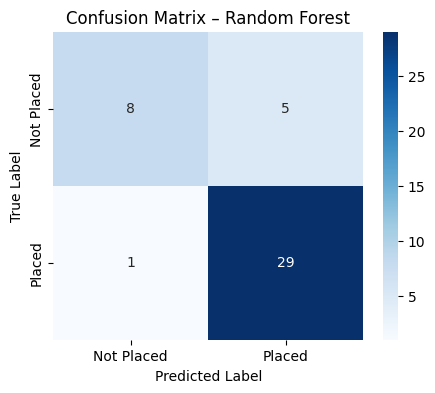

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    ))
])

In [25]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ssc_percentage',
                                                   'hsc_percentage',
                                                   'degree_percentage',
                                                   'mba_percent',
                                                   'years_experience',
                                                   'skills_match_percent',
                                                   'num_certifications',
                                                   'emp_test_percentage',
                                                   'interview_score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'ssc_board',
                                                   'hsc_board', 'hsc_subject',
                                                   'undergrad_degree',
                                                   'specialisation',
                                                   'work_experience',
                                                   'internship_completed',
                                                   'company_tier',
                                                   'job_competition_level'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [26]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



/tmp/ipython-input-180197318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


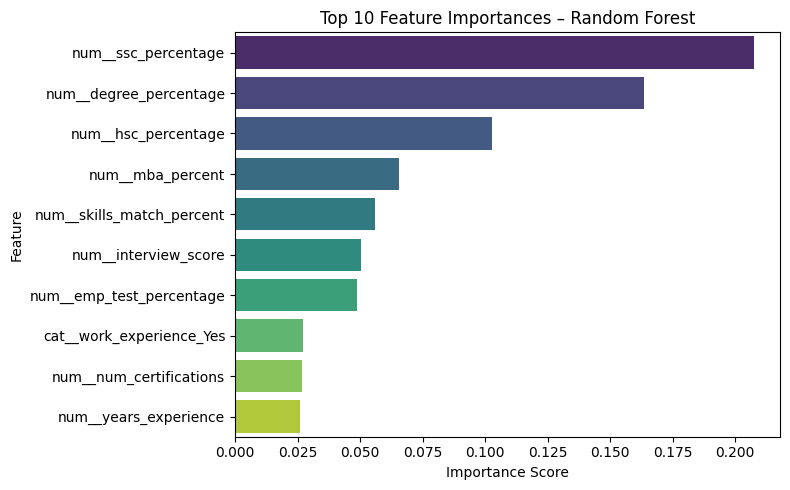

In [36]:
top_rf = importance_df.head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_rf,
    palette='viridis'
)

plt.title("Top 10 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [27]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [28]:
from catboost import CatBoostClassifier

In [29]:
cat_features = [
    X.columns.get_loc(col)
    for col in categorical_features
]

In [30]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100,
    random_state=42
)

cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test)
)

0:	test: 0.8179487	best: 0.8179487 (0)	total: 69.5ms	remaining: 34.7s
100:	test: 0.9025641	best: 0.9025641 (100)	total: 1.01s	remaining: 4.01s
200:	test: 0.9153846	best: 0.9153846 (200)	total: 1.79s	remaining: 2.67s
300:	test: 0.9230769	best: 0.9256410 (243)	total: 2.51s	remaining: 1.66s
400:	test: 0.9205128	best: 0.9256410 (243)	total: 3.42s	remaining: 844ms
499:	test: 0.9179487	best: 0.9256410 (243)	total: 4.38s	remaining: 0us

bestTest = 0.9256410256
bestIteration = 243

Shrink model to first 244 iterations.


In [31]:
cat_pred = cat_model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, cat_pred))
print("\nClassification Report:\n", classification_report(y_test, cat_pred))

CatBoost Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43



In [32]:
feature_names = (
    rf_model.named_steps['preprocessor']
    .get_feature_names_out()
)

In [33]:
importances = rf_model.named_steps['classifier'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
0,num__ssc_percentage,0.207618
2,num__degree_percentage,0.163560
1,num__hsc_percentage,0.102882
3,num__mba_percent,0.065508
5,num__skills_match_percent,0.056100
8,num__interview_score,0.050202
7,num__emp_test_percentage,0.048813
24,cat__work_experience_Yes,0.027099
6,num__num_certifications,0.026604
4,num__years_experience,0.026027


In [34]:
cat_importance = cat_model.get_feature_importance(prettified=True)
cat_importance.head(10)

,Feature Id,Importances
0,ssc_percentage,21.145709
1,degree_percentage,15.547610
2,mba_percent,12.025538
3,hsc_percentage,8.845569
4,work_experience,6.859343
5,undergrad_degree,4.237470
6,interview_score,3.962105
7,job_competition_level,3.631888
8,company_tier,3.423923
9,skills_match_percent,3.270963


/tmp/ipython-input-74424868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


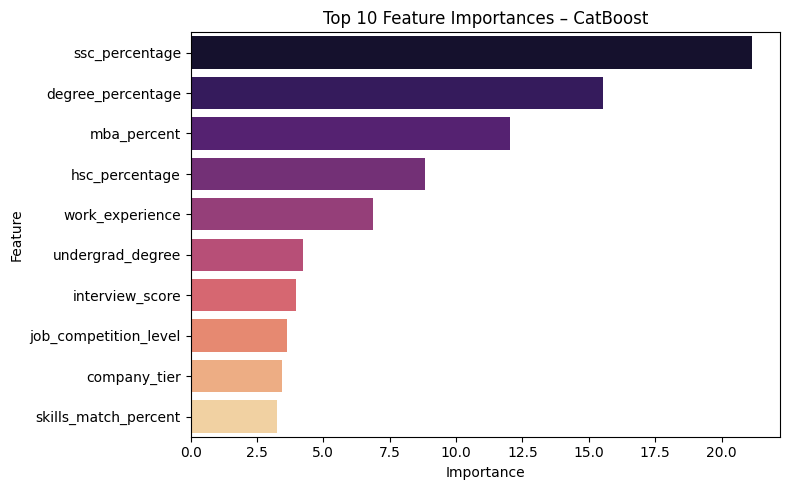

In [38]:
top_cat = cat_importance.head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x='Importances',
    y='Feature Id',
    data=top_cat,
    palette='magma'
)

plt.title("Top 10 Feature Importances – CatBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3076055328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


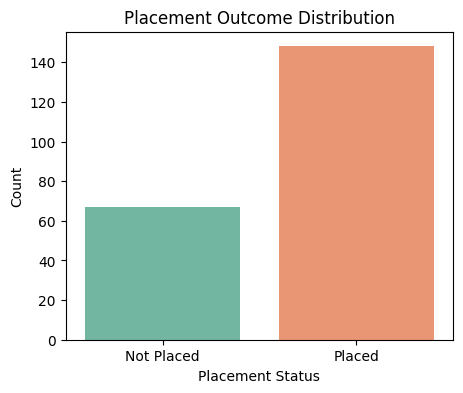

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette='Set2')

plt.xticks([0,1], ['Not Placed', 'Placed'])
plt.title("Placement Outcome Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Count")
plt.show()

The dataset is slightly imbalanced, with more placed candidates, which influenced recall-focused evaluation.

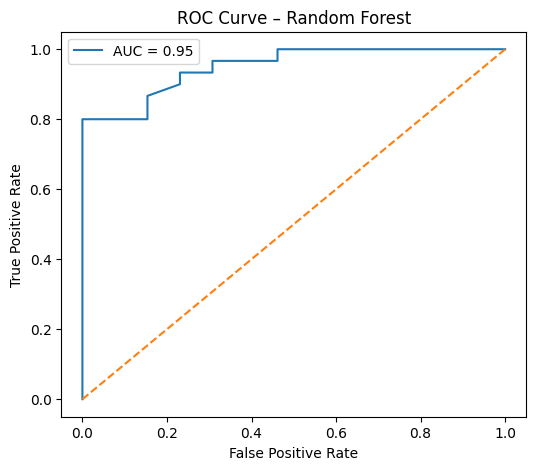

In [41]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()

Visual analysis reveals that academic performance indicators such as SSC, HSC, degree, and MBA percentages play the most significant role in placement outcomes. Skills match percentage, interview performance, and work experience also strongly influence hiring decisions. Model evaluation plots demonstrate strong predictive capability, particularly in identifying candidates who are likely to be placed.

In [42]:
import joblib
joblib.dump(rf_model, "job_acceptance_model.pkl")

['job_acceptance_model.pkl']